### Maestría en Ciudades Sostenibles

# Manejo y Análisis de Datos
***
## Aprendizaje supervisado

Mateo Neira
***

## Regresión

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression

# Regresores para comparar
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [50]:
# crear conjuntos de datos de regresión sintéticos (Uno lineal, uno sinusoidal, un polinomial)
rng = np.random.RandomState(1)
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
dataset_linear = (X, y)

#sinusoidal dataset
X_sin = np.sort(5 * rng.rand(80, 1), axis=0)
y_sin = np.sin(X_sin).ravel()
y_sin +=  (0.5 - rng.rand(80, 1)).ravel() # Add noise
dataset_sin = (X_sin, y_sin)

#polynomial dataset
X_poly = np.sort(5 * rng.rand(80, 1), axis=0)
y_poly = (1/6*X_poly ** 4 - 5 *X_poly ** 2 + 1/5*X_poly).ravel()
y_poly+= 5 * (0.5 - rng.rand(80, 1)).ravel() # Add noise
dataset_polynomial = (X_poly, y_poly)

datasets = [dataset_linear, dataset_sin, dataset_polynomial]

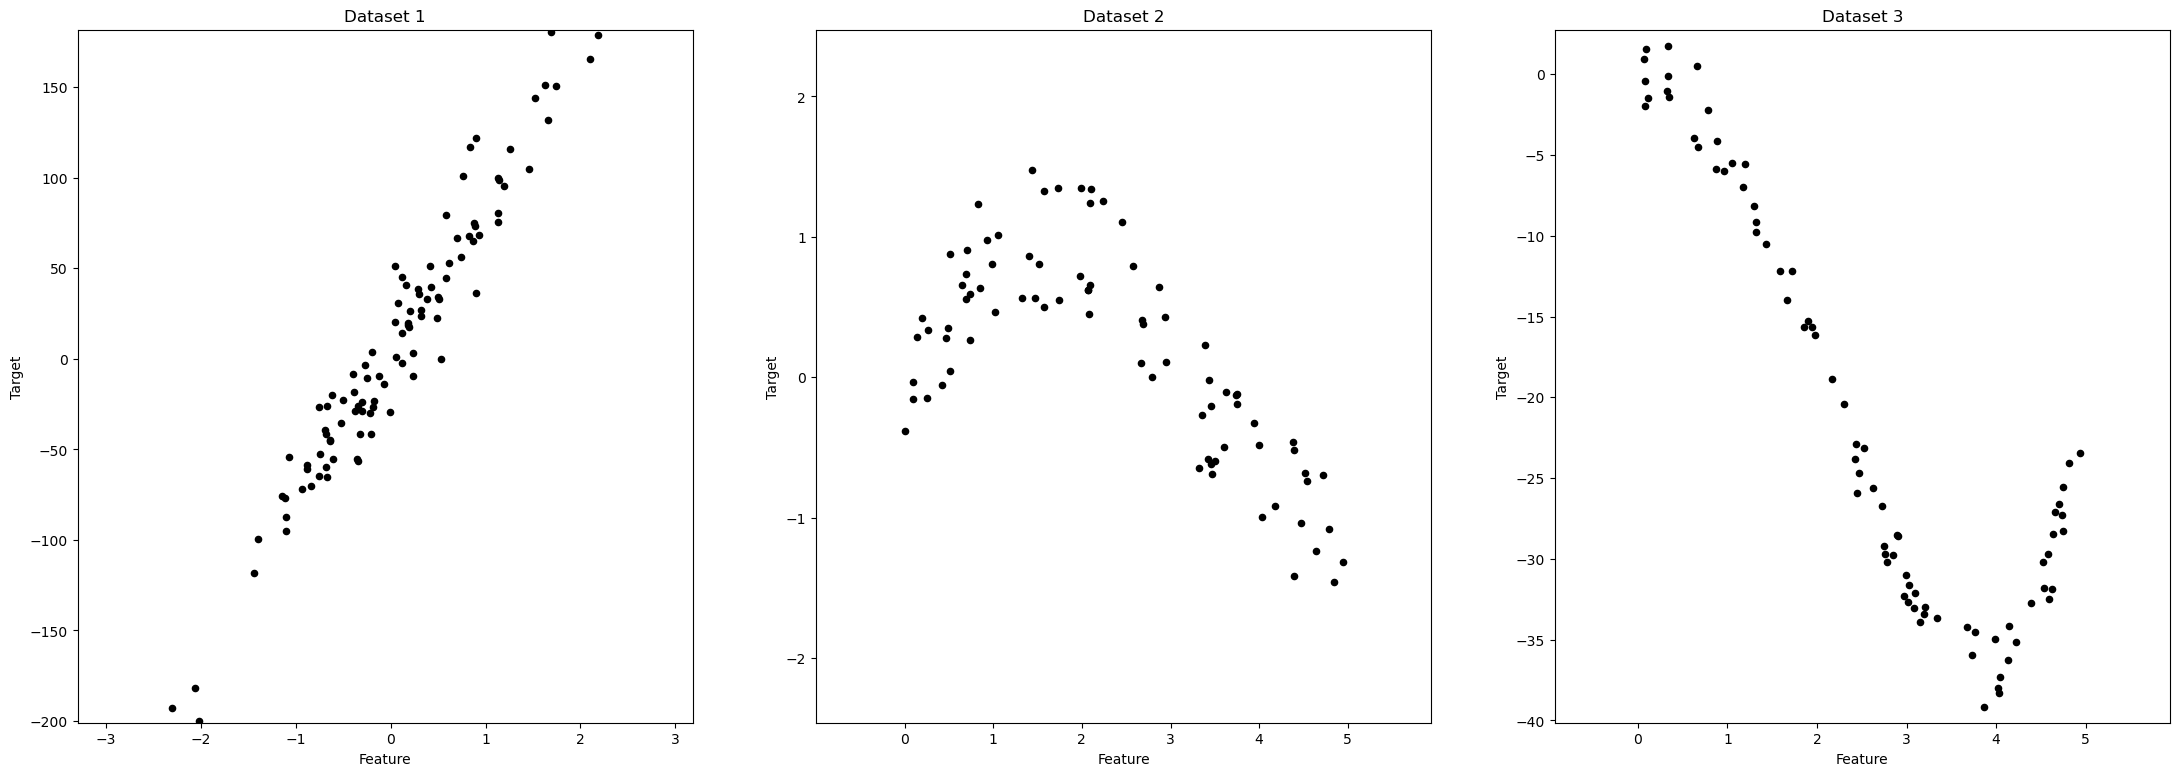

In [51]:
# plotamos los datos generados
figure = plt.figure(figsize=(27, 9))

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1

    ax = plt.subplot(1, len(datasets), ds_cnt + 1)
    ax.scatter(X, y, c="k", s=20)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"Dataset {ds_cnt + 1}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

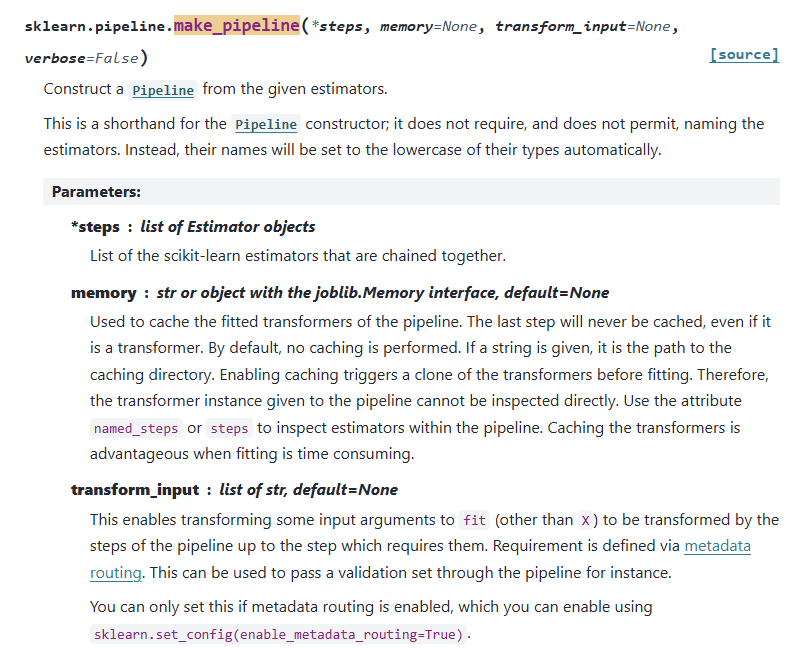

c:\Users\mateo\miniconda3\envs\ciudades_sustentables\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mateo\miniconda3\envs\ciudades_sustentables\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


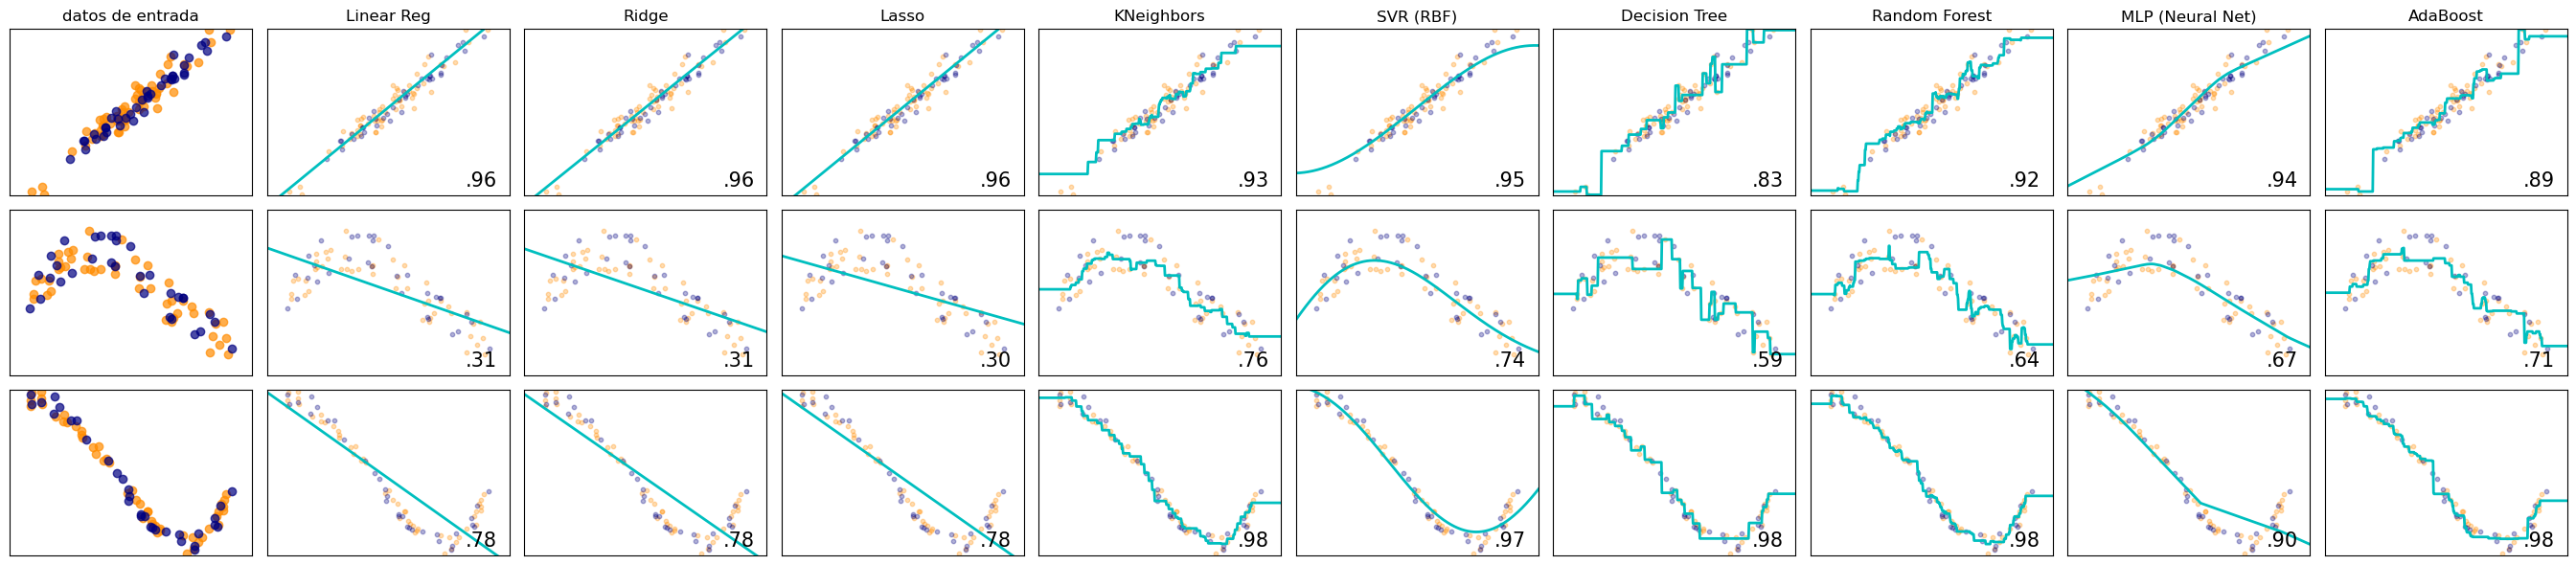

In [53]:
# Definir los regresores a comparar
names = [
    "Linear Reg",
    "Ridge",
    "Lasso",
    "KNeighbors",
    "SVR (RBF)",
    "Decision Tree",
    "Random Forest",
    "MLP (Neural Net)",
    "AdaBoost",
]

# instanciar los regresores
regressors = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    KNeighborsRegressor(n_neighbors=5),
    SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1),
    DecisionTreeRegressor(max_depth=5),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1000),
    AdaBoostRegressor(),
]
# Crear la figura para los resultados
figure = plt.figure(figsize=(27, 6))
i = 1

#iterar sobre conjuntos de datos
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X.min() - 0.5, X.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5

    # graficar solo el conjunto de datos primero
    ax = plt.subplot(len(datasets), len(regressors) + 1, i)
    if ds_cnt == 0:
        ax.set_title("datos de entrada")
    
    # grafica los puntos de entrenamiento
    ax.scatter(X_train, y_train, color="darkorange", alpha=0.7, label="Entrenamiento")
    # grafica los puntos de prueba
    ax.scatter(X_test, y_test, color="navy", alpha=0.7, label="Prueba")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterar sobre los regresores
    for name, reg in zip(names, regressors):
        ax = plt.subplot(len(datasets), len(regressors) + 1, i)
        
        # Crear pipeline para escalar datos (importante para SVR/MLP)
        regr = make_pipeline(StandardScaler(), reg)
        regr.fit(X_train, y_train)
        score = regr.score(X_test, y_test)

        # Graficar los puntos de datos nuevamente
        ax.scatter(X_train, y_train, color="darkorange", alpha=0.3, s=10)
        ax.scatter(X_test, y_test, color="navy", alpha=0.3, s=10)

        # Graficar la línea/curva de regresión
        X_plot = np.linspace(x_min, x_max, 500)[:, None]
        y_plot = regr.predict(X_plot)
        ax.plot(X_plot, y_plot, color="c", linewidth=2)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_cnt == 0:
            ax.set_title(name)
        
        # Mostrar el puntaje R2
        ax.text(
            0.95, 0.05,
            (f"{score:.2f}").lstrip("0"),
            transform=ax.transAxes,
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# importamos distintos clasificadores de scikit-learn para comparar su desempeño
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#importamos utilidades para la evaluación y visualización de los clasificadores
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

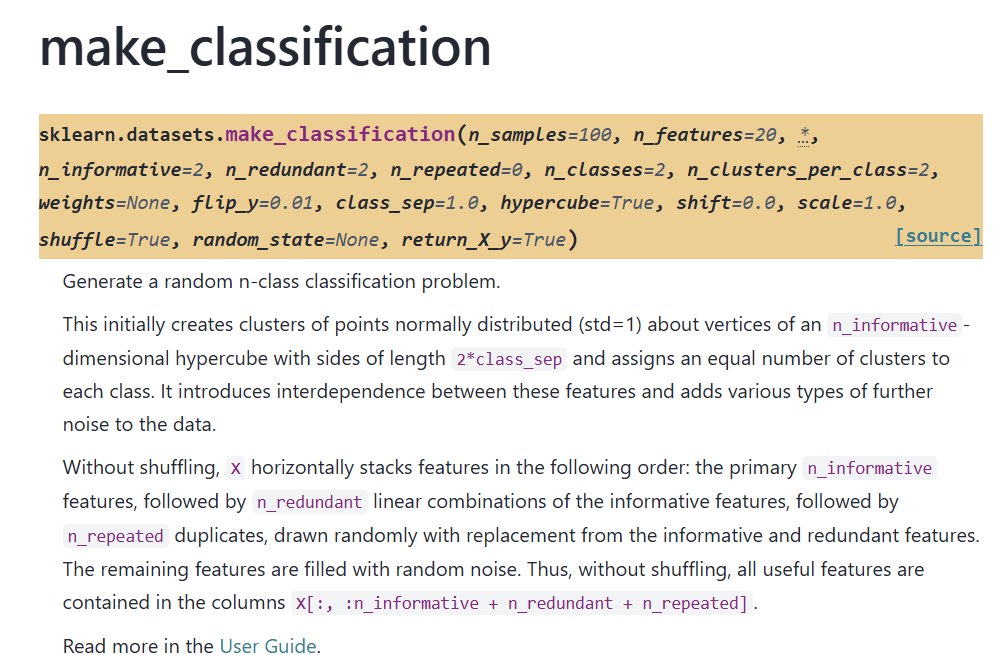

In [55]:
#creamos un conjunto de datos de clasificación sintético linealmente separable
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

#creamos una lista de conjuntos de datos para evaluar los clasificadores
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

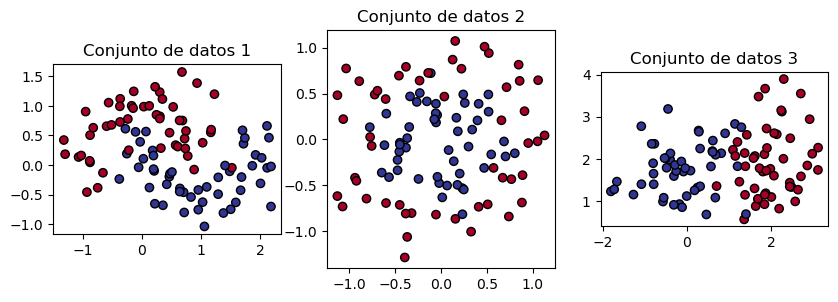

In [56]:
# ploteamos los conjuntos de datos
figure, ax = plt.subplots(1,3, figsize=(10, 8))
i = 1
for ds in datasets:
    X, y = ds
    ax = plt.subplot(1, 3, i)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="k")
    ax.set_title("Conjunto de datos %d" % i)
    i += 1
    ax.set_aspect("equal")
plt.show()


In [57]:
#creamos una lista de nombres de los clasificadores
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

#creamos una lista de clasificadores instanciados con sus hiperparámetros
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

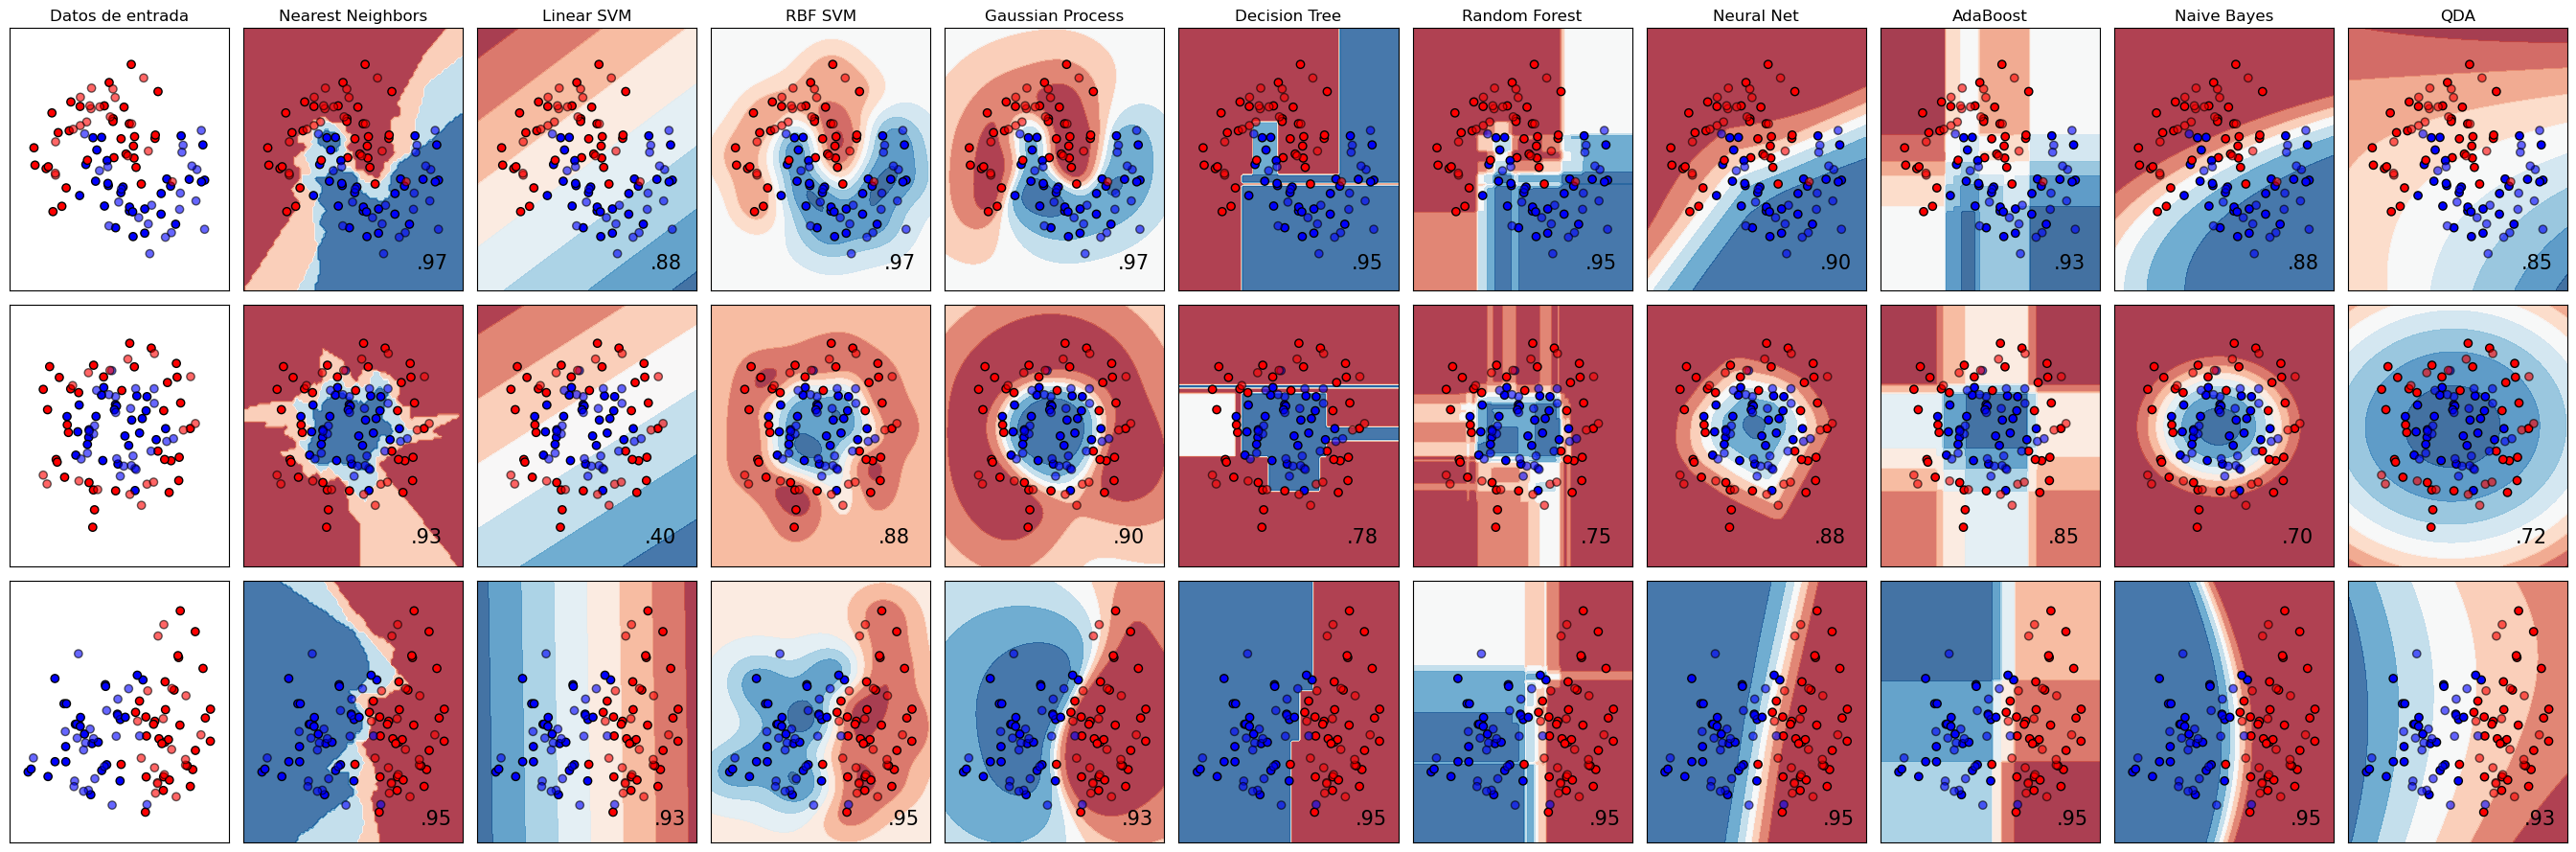

In [58]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterar sobre conjuntos de datos
for ds_cnt, ds in enumerate(datasets):
    # preprocesar el conjunto de datos, dividir en entrenamiento y prueba
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # solo graficar el conjunto de datos primero
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Datos de entrada")
    # Graficar los puntos de entrenamiento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Graficar los puntos de prueba
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterar sobre clasificadores
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Graficar los puntos de entrenamiento
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Graficar los puntos de prueba
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()